# Set Up Notebook

In [1]:
# setup notebook for interactive graphs
%matplotlib widget

## Set up corpuses

In [2]:
corpus_bark = [
    ["Dog", "Bark"],
    ["Tree", "Bark"],
    ["Dog","Sound", "Bark"],
    ["Tree", "Sound", "Creak"]
]

corpus_food = [
    ["Dog"],
    ["Cat"],
    ["Rabbit"],
    ["Fish"],
    ["Dog", "Fish"],
    ["Cat", "Fish"],
    ["Cat", "and", "Dog"],
    ["Chips"],
    ["Fish", "and", "Chips"],
    ["Burger"],
    ["Burger", "and", "Chips"],
    ["Burger", "Dinner"],
    ["Fish", "Dinner"],
    ["Chips", "Dinner"],
    ["Rabbit", "Pet"],
    ["Fish", "Pet"],
    ["Cat", "Pet"],
    ["Dog", "Pet"]
]

corpus_capital = [
    ["Paris", "Capital"],
    ["Rome", "Capital"],
    ["Rome", "Italy"],
    ["Paris", "France"],
    ["Italy", "Country"],
    ["France", "Country"],
    ["England", "Country"],
    ["London", "England"],
    ["London", "Capital"],
    ["Cardiff", "Wales"],
    ["Wales", "Country"],
    ["Cardiff", "Capital"],
    ["Madrid", "Spain"],
    ["Madrid", "Capital"],
    ["Spain", "Country"],
    ["Edinburgh", "Scotland"],
    ["Scotland", "Country"],
    ["Edinburgh", "Capital"],
    ["Greece", "Athens"],
    ["Athens", "Capital"],
    ["Greece", "Country"]
]

corpus_capital_small = [
    ["Paris", "Capital"],
    ["Rome", "Capital"],
    ["Rome", "Italy"],
    ["Paris", "France"],
    ["Italy", "Country"],
    ["France", "Country"]
]

In [3]:
import nltk
from nltk.corpus import brown
nltk.download('brown')

corpus_brown = brown.sents()

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\danca\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


## Load pretrained embeddings models

bark has very small magnitude because it is the least discriminating.

sound has the most different vector as it is the most discriminating

dog and tree have similar vectors even though they don't co-occur, is this interference? i think so

In [4]:
import gensim.downloader as api

model_google_news = api.load('word2vec-google-news-300')

In [5]:
model_glove = api.load("glove-wiki-gigaword-50")

In [9]:
class wrapper:
  def __init__(self, model):
    self.wv = model
    self.vector_size = model.vector_size
  
  def __str__(self) -> str:
    return f"model<vocab=?, vector_size={self.vector_size}>"

#wrap glove and google news so they can be treated in the same way as the trained models
model_glove_wrapped = wrapper(model_glove)
model_google_news_wrapped = wrapper(model_google_news)

# Tooling

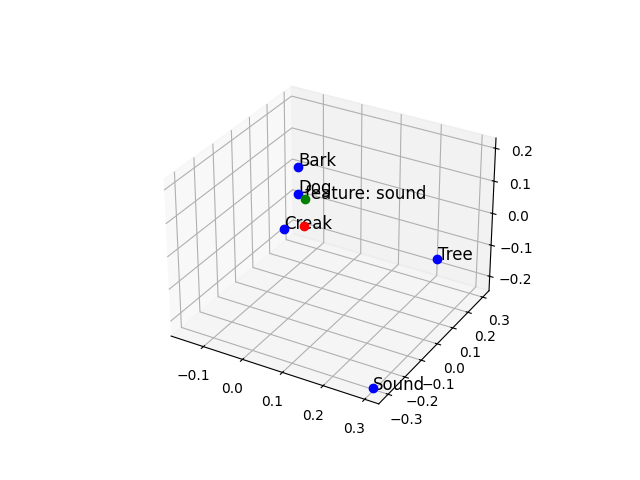

In [7]:
import numpy as np
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

def train_model(corpus, dimensions):
  # Train Word2Vec model
  model = Word2Vec(corpus, vector_size=dimensions, window=5, min_count=1, sg=1)
  return model

def corpus_vocab(corpus):
  return np.unique([word for sublist in corpus for word in sublist])

def getCoords(vocab, model):
  xs = []
  ys = []

  for word in vocab:
    v = model.wv[word]
    xs.append(v[0])
    ys.append(0)
  return xs, ys

def plot_on_graph(point, annotation, graph):
  graph.plot(point[0], point[1], point[2],  'go')
  graph.text(point[0] * (1 + 0.01), point[1] * (1 + 0.01), point[2] * (1 + 0.01) , annotation, fontsize=12)
  return graph

def plot_point(point, ax, dimensions, colour):
  v = point["vector"]
  if dimensions <=2:
    ax.plot(v[0], v[1], colour)
    ax.text(v[0] * (1 + 0.01), v[1] * (1 + 0.01) , point["annotation"], fontsize=12)

  elif dimensions >=3:
    # syntax for 3-D projection
    ax.plot(v[0], v[1], v[2], colour)
    ax.text(v[0] * (1 + 0.01), v[1] * (1 + 0.01) , v[2] * (1 + 0.01) , point["annotation"], fontsize=12, zorder=1)
  return ax

def plot(points, dimensions, additional_points):
  fig = plt.figure()
  if dimensions>=3:
    ax = plt.axes(projection ='3d')
    #plot origin
    ax.plot(0, 0, 0, 'ro')
  elif dimensions==2:
    ax = plt.axes()
    #plot origin
    ax.plot(0, 0, 'ro')
  
  for i, p in enumerate(points):
    ax = plot_point(p, ax, dimensions, "bo")
  for i, p in enumerate(additional_points):
    ax = plot_point(p, ax, dimensions, "go")
    
  return fig

def prepare_word_plots(vocab, model):
  points = []
  for i, word in enumerate(vocab):
    v = model.wv[word]
    p = {
      "annotation": word,
      "vector": v
    }
    points.append(p)

  return points

def all(corpus, dimensions):
  vocab = corpus_vocab(corpus)
  model = train_model(corpus, dimensions)
  word_points = prepare_word_plots(vocab, model)
  points = word_points
  additional_points = [{
      "annotation": "feature: sound",
      "vector": model.wv["Bark"] - model.wv["Dog"]
    }
  ]
  '''
  additional_points = [
    {
      "annotation": "feature: capital",
      "vector": model.wv["Rome"] - model.wv["Italy"]
    },
    {
      "annotation": "calculated: paris?",
      "vector": model.wv["Rome"] - model.wv["Italy"] + model.wv["France"]
    },
    {
      "annotation": "calculated: rome?",
      "vector": model.wv["Paris"] - model.wv["France"] + model.wv["Italy"]
    },

  ]
  '''
  graph = plot(points, dimensions, additional_points)
  return model, vocab, graph

#all(corpus, 1)
model, vocab, graph = all(corpus_bark, 3)
#v1 = model.wv["Rome"]-model.wv["Italy"]+model.wv["France"]
#v2 = model.wv["Paris"]
#print(model.wv.cosine_similarities(v1, [v2]))
#plot_on_graph([0,1,2], "", graph)


In [8]:
model, vocab, graph = all(corpus_capital, 3)

KeyError: "Key 'Bark' not present"

[0.58411497]
[-0.7114783]
[0.02557658]


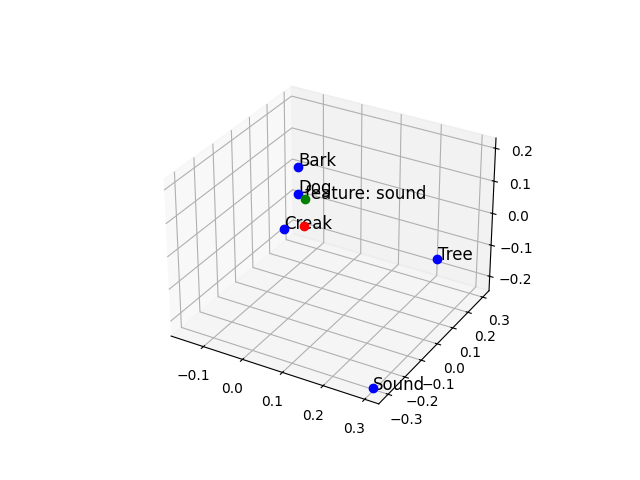

In [10]:
model, vocab, graph = all(corpus_bark, 3)
v1 = model.wv["Bark"]-model.wv["Dog"]+model.wv["Tree"]
v2 = model.wv["Tree"]
print(model.wv.cosine_similarities(v1, [v2]))

v1 = model.wv["Bark"]-model.wv["Tree"]+model.wv["Dog"]
v2 = model.wv["Sound"]
print(model.wv.cosine_similarities(v1, [v2]))

v1 = model.wv["Creak"]-model.wv["Tree"]+model.wv["Dog"]
v2 = model.wv["Bark"]
print(model.wv.cosine_similarities(v1, [v2]))

The cosine similarity ranges from -1 to 1:
1: Indicates identical vectors (perfect similarity).
0: Implies no similarity (orthogonal vectors).
-1: Represents opposite vectors (maximum dissimilarity).

In [11]:
corpus = corpus_brown[:100]
brown_model, vocab, graph = all(corpus, 10) # todo, way to only plot subset of points on graph
model = brown_model
print("len vocab: ", len(vocab))

KeyError: "Key 'Bark' not present"

## Comparing different models

In [12]:
def compare(models, pairs):
    for model in models:
        for pair in pairs:
            v = model[pair[0]] - model[pair[1]]
            print(model.most_similar(v))
    

compare([model_glove, model_google_news], [("squirrel", "car")])
compare([model_glove, model_google_news], [("potato", "woman")])
compare([model_glove, model_google_news], [("orange", "yoga")])

[('yertle', 0.7258438467979431), ('planthopper', 0.6968123912811279), ('topminnow', 0.6945979595184326), ('charmouth', 0.6890265345573425), ('angeln', 0.685926079750061), ('beti', 0.6715450286865234), ('leukoplakia', 0.6687938570976257), ('nutkin', 0.6603258848190308), ('twrch', 0.660240113735199), ('swiftlet', 0.6594457626342773)]
[('squirrel', 0.7111223340034485), ('squirrels', 0.5958611965179443), ('owl', 0.4927455186843872), ('red_breasted_nuthatch', 0.48885369300842285), ('owls', 0.47947263717651367), ('critters', 0.47945472598075867), ('Barred_Owl', 0.4778265655040741), ('raccoon', 0.4775029420852661), ('grackle', 0.47536033391952515), ('bobwhite', 0.4752081036567688)]
[('croquettes', 0.6554169058799744), ('quinoa', 0.6544211506843567), ('harvesters', 0.6539561748504639), ('opilio', 0.6533445119857788), ('groundnut', 0.6506465673446655), ('mashers', 0.6493769884109497), ('manioc', 0.6464586853981018), ('crisps', 0.6405561566352844), ('amflora', 0.6401406526565552), ('pringles', 0

the most similar vector to orange-yoga is still orange. This means that either:
1. yoga has a small magnitude
2. yoga does not interfere with orange

We want to find a pair of words that reliably produces an unintuitive word when subtracted from each other. How do we do that?

Perhaps I need to look at the vectors and see which dimensions change.

In [13]:
compare([model_glove, model_google_news], [("squirrel", "phone")])
compare([model_glove, model_google_news], [("potato", "square")])
compare([model_glove, model_google_news], [("poland", "yoga")])

[('nutkin', 0.7318739295005798), ('shrew', 0.724825918674469), ('grizzly', 0.6996013522148132), ('darner', 0.6786478757858276), ('rhinoceros', 0.6724755167961121), ('tarporley', 0.6670932769775391), ('lillies', 0.6641578078269958), ('louse', 0.6579570770263672), ('merda', 0.6428161859512329), ('e.n.d.', 0.6408583521842957)]
[('squirrel', 0.737991452217102), ('squirrels', 0.5947400331497192), ('fox', 0.4847506284713745), ('critters', 0.4617171287536621), ('gray_squirrel', 0.4523264169692993), ('red_tailed_hawk', 0.451271116733551), ('raccoon', 0.45003798604011536), ('monarch_caterpillars', 0.44542571902275085), ('bird', 0.44502314925193787), ('buzzard', 0.4445395767688751)]
[('nutsy', 0.6632758975028992), ('skippy', 0.6596720218658447), ('creamed', 0.6536835432052612), ('spaetzle', 0.6486536860466003), ('sawney', 0.6484820246696472), ('coleslaw', 0.6453075408935547), ('mashers', 0.6425214409828186), ('beet', 0.6403196454048157), ('vichyssoise', 0.6386362910270691), ('potato', 0.63555395

# Experiments

In [14]:
model_google_news.most_similar(positive=['man'], negative=['potato'])

[('woman', 0.512745201587677),
 ('teenager', 0.42085593938827515),
 ('boy', 0.41502395272254944),
 ('teenage_girl', 0.40686455368995667),
 ('suspected_purse_snatcher', 0.38468220829963684),
 ('men', 0.37045347690582275),
 ('girlfriend', 0.3650696873664856),
 ('teen_ager', 0.36436158418655396),
 ('robber', 0.3615001440048218),
 ('girl', 0.36067575216293335)]

In [15]:
model_google_news.most_similar(positive=['car'], negative=['cat'])

[('vehicle', 0.5048961043357849),
 ('cars', 0.5032103657722473),
 ('minivan', 0.4524582326412201),
 ('Ford_Focus', 0.43961387872695923),
 ('vehicles', 0.43748754262924194),
 ('Subaru_WRX', 0.42426130175590515),
 ('SUV', 0.4210273325443268),
 ('Mercedes', 0.41875159740448),
 ('Toyota_Corolla', 0.4186876714229584),
 ('Toyota_Camry', 0.4182584583759308)]

In [16]:
model_google_news.most_similar(positive=['car'])

[('vehicle', 0.7821096181869507),
 ('cars', 0.7423831224441528),
 ('SUV', 0.7160962224006653),
 ('minivan', 0.6907036900520325),
 ('truck', 0.6735789775848389),
 ('Car', 0.6677608489990234),
 ('Ford_Focus', 0.667320191860199),
 ('Honda_Civic', 0.6626849174499512),
 ('Jeep', 0.651133120059967),
 ('pickup_truck', 0.6441438794136047)]

In [17]:
model_google_news.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

for topics to be interfering, they have to be unrelated and non-co-occurring but close in vector space. Is this even possible given how embeddings work?



when I asked dad the difference between a car and a potato, he proceded to list certain differences such as not living, natural/unnatural, made out of components,

I suppose more what the difference is, is not the difference between their concepts, but the difference in how they occur in text - these things are related but not the same.

rearranging the equation may help understand.



In [18]:
import numpy as np

def test(model, index, magnitude):
    dimensions = len(model[0])
    v1 = np.zeros(dimensions)
    v1[index] = magnitude
    print(model.most_similar(v1))
    most_similar_word = model.most_similar(v1)[0][0]
    print(model[most_similar_word])

#print(model_google_news["dog"])

In [19]:
for i in range(10):
    test(model_google_news, i, 1)

print("\n",model_google_news.most_similar(model_google_news["muffle"]))
print(model_google_news["muffle"])

[('apocalyptic_prophesy', 0.25545403361320496), ('Mythica', 0.24702315032482147), ('sits_enthroned', 0.2460421621799469), ('wcg', 0.2410862147808075), ('Setup_Tool', 0.2381514608860016), ('mythological', 0.2376524657011032), ('charismatic_preacher', 0.2375769168138504), ('Runes', 0.23673412203788757), ('anti_Semitic_tropes', 0.2344093918800354), ('Ancheta', 0.2320334017276764)]
[ 3.33984375e-01 -6.59179688e-02  1.64794922e-02  2.64892578e-02
  3.73535156e-02 -7.78198242e-03 -3.41796875e-02  4.61425781e-02
  1.22558594e-01 -5.49316406e-02 -4.19921875e-02  1.57470703e-02
 -9.76562500e-02  1.11328125e-01 -9.57031250e-02  1.03515625e-01
 -9.66796875e-02  8.17871094e-03 -5.15136719e-02  3.29589844e-02
 -8.98437500e-02 -2.40325928e-04 -7.01904297e-04  2.28271484e-02
  1.73828125e-01 -7.71484375e-02  3.99780273e-03 -8.34960938e-02
 -8.05664062e-02 -9.66796875e-02 -6.88476562e-02 -4.80957031e-02
 -1.23046875e-01 -5.41992188e-02 -6.64062500e-02  7.71484375e-02
 -1.32812500e-01  3.12500000e-02  

In [20]:
for i in range(10):
    test(model_glove, i, 1)

[('annelid', 0.5447914004325867), ('maddalena', 0.5430718064308167), ('polychaete', 0.5371790528297424), ('ares', 0.5224992036819458), ('herculaneum', 0.5216749310493469), ('exoplanets', 0.5210447907447815), ('sardinia', 0.5141404867172241), ('ridolfi', 0.5118063688278198), ('worms', 0.5105652809143066), ('mediobanca', 0.5069678425788879)]
[ 2.9927e+00 -1.6276e+00  1.4501e-01 -4.8933e-01  4.6441e-01  4.2111e-03
  9.7926e-01 -1.3409e+00 -2.2216e-01 -2.8396e-01 -4.8367e-01  7.3288e-01
  1.0695e+00  4.6425e-01 -8.7347e-01 -8.2998e-01 -8.7180e-01  6.1252e-01
 -3.8628e-01  8.3638e-01 -3.8804e-01 -1.0084e+00  2.2008e-01  3.3944e-01
 -1.1448e-01  2.7103e-01 -1.3390e-01 -7.5831e-04 -6.2690e-01  1.2330e-01
 -9.6300e-01 -7.4734e-01  6.6214e-02 -2.8391e-02 -3.8522e-01  7.0251e-01
 -7.1564e-01  1.5274e-01  3.9237e-01  1.5189e-01  5.2874e-01  6.2377e-01
 -2.0179e-02  8.3237e-01  1.1086e+00  4.0841e-01  1.1277e+00 -5.8982e-01
  7.5188e-01  9.8801e-02]
[('romijn', 0.537285566329956), ('mt.', 0.534679

In [21]:
model_brown_10 =  train_model(corpus_brown, 10)

In [22]:
model_brown_20 =  train_model(corpus_brown, 20)

In [23]:
model_brown_50 =  train_model(corpus_brown, 50)

In [24]:
for i in range(10):
    test(model_brown_10.wv, i, 1)

[('Varying', 0.6168603897094727), ('uh-huh', 0.583146870136261), ('Phenothiazine', 0.5403961539268494), ('Morale', 0.5263416767120361), ('Rectangular', 0.519883930683136), ('Cynical', 0.5176423192024231), ('Norms', 0.5040208697319031), ('Contraction', 0.48302310705184937), ('Condensation', 0.46344366669654846), ('Shotguns', 0.44667500257492065)]
[ 0.09204505 -0.00645049 -0.00603199  0.03021737  0.05318446  0.04596911
  0.08285704 -0.0254111  -0.01163715  0.01461742]
[('three-front', 0.6894173622131348), ('should', 0.6842465400695801), ('will', 0.6820538640022278), ('does', 0.6753864884376526), ('shall', 0.6740624308586121), ('Astronomy', 0.6739395260810852), ('is', 0.6618713736534119), ('gives', 0.6604021191596985), ('takes', 0.6509317755699158), ('Wards', 0.6412184834480286)]
[ 5.40075311e-03  1.02260515e-01  2.69172750e-02 -2.48283688e-02
  8.65012407e-06  3.30621228e-02 -2.88962871e-02 -7.11463243e-02
 -4.89008278e-02 -2.81585529e-02]
[('Methyl', 0.8563483357429504), ('Bingles', 0.8

In [25]:
for i in range(10):
    test(model_brown_20.wv, i, 1)


[('Sentiment', 0.39596760272979736), ('Nightclubs', 0.30227842926979065), ('2', 0.29405590891838074), ('Meats', 0.293933629989624), ('Proprietorship', 0.2829979360103607), ('1', 0.2817416191101074), ('A5', 0.2776730954647064), ('2-2', 0.26779791712760925), ('Plants', 0.26266977190971375), ('Af', 0.2626153528690338)]
[ 0.04157705  0.02869093 -0.00420073  0.0221343  -0.00931182  0.02129346
 -0.01131652 -0.03718281  0.02116146  0.02010116  0.01443278  0.00801932
 -0.03411286 -0.02194406 -0.02599314 -0.00014941  0.00688677 -0.04350217
 -0.02018009  0.01107354]
[('2.1.6', 0.3822046220302582), ('Backbends', 0.3745667636394501), ('Norms', 0.3637314736843109), ('his', 0.3632514774799347), ('turned', 0.3422107696533203), ('hand', 0.34106239676475525), ('Syllabification', 0.32448798418045044), ('Thirty-six', 0.31481418013572693), ('A5', 0.31306836009025574), ('walked', 0.3021528422832489)]
[-0.04064462  0.04777312  0.04579526 -0.01716687 -0.02796545  0.0099468
  0.03076731 -0.02546138  0.0162969

In [26]:
for i in range(10):
    test(model_brown_50.wv, i, 1)

[('cent', 0.3287065625190735), ('per', 0.3245770335197449), ('12', 0.30945149064064026), ('17', 0.30169937014579773), ('1959', 0.2944173216819763), ('5', 0.2924070656299591), ('June', 0.292021244764328), ('-', 0.2914822995662689), ('Sept.', 0.2880512773990631), ('23', 0.28750383853912354)]
[ 1.244411    0.6430356  -0.19038941  0.05901553 -0.20515433  0.20798576
  0.35697776  0.7972532   0.04285384 -0.818622   -0.04805251  0.27979606
 -0.12917352  0.02466358  0.99160343  0.22904685  0.48056424  0.04139901
 -0.8678929  -0.9740631  -0.11589505 -0.2649659   1.211092    0.48907465
 -0.01883293  0.0715505  -0.46659124  0.48802012 -0.5629155   0.5928755
  0.16531676 -0.4665134  -0.06540404 -0.69773394 -0.8789724  -0.31523743
 -0.1903287   0.33884957 -0.16955471 -0.32913443 -0.17158735  0.27089393
 -0.0056508  -0.01995873  0.3631443  -0.80798465  0.58350694 -1.190112
  0.16683038  0.50354004]
[('Af', 0.40241262316703796), ('temperature', 0.3198346495628357), ('low', 0.31296443939208984), ('8',

In [27]:
model_brown_3 =  train_model(corpus_brown, 3)
for i in range(3):
    test(model_brown_3.wv, i, 1)

[('maxim', 0.9719204306602478), ('Snapped', 0.9691571593284607), ('Compassionately', 0.9678894281387329), ('gulley', 0.966513991355896), ('upperclassmen', 0.9642114639282227), ('geochemistry', 0.9602100253105164), ('Summertime', 0.95893794298172), ('Anthropologists', 0.9580807089805603), ('Clapping', 0.9494093656539917), ('Coconuts', 0.9468762278556824)]
[0.24614196 0.05841888 0.01177079]
[('138', 0.9998583793640137), ('Plants', 0.9997149109840393), ('Galatians', 0.9980888962745667), ('Innumerable', 0.9976902604103088), ('Noon', 0.9969092607498169), ('Thirty-four', 0.9962167739868164), ('Narrative', 0.9952448606491089), ('Fads', 0.9948176741600037), ('Build', 0.9934517741203308), ('polysiloxanes', 0.9906471967697144)]
[-0.00133926  0.25580356 -0.00409203]
[('hath', 0.999995231628418), ('retina', 0.9999921917915344), ('Jolliffe', 0.9999920725822449), ('conquests', 0.9999915957450867), ('Onsets', 0.9999900460243225), ('judges', 0.9999886751174927), ('Film', 0.9999867677688599), ('pushers

In [28]:
model_brown_4 =  train_model(corpus_brown, 4)
for i in range(4):
    test(model_brown_4.wv, i, 1)

[('Compassionately', 0.883465588092804), ('Socialization', 0.866828978061676), ('reddened', 0.8084649443626404), ('Achieving', 0.8079986572265625), ('Resourceful', 0.7351656556129456), ('Kas.', 0.7212629914283752), ('A5', 0.714824378490448), ('errs', 0.7108663320541382), ('Diethylstilbestrol', 0.6911810636520386), ('Backbends', 0.6758335828781128)]
[ 0.12106082 -0.02700027 -0.05593743  0.01622777]
[('Pioneers', 0.9781426787376404), ('Fermate', 0.9605944752693176), ('affable', 0.9348080158233643), ('Rouben', 0.9325267672538757), ('reunions', 0.9317861795425415), ('Exboyfriend', 0.917586088180542), ('Take-up', 0.9062397480010986), ('marrowbones', 0.8988434672355652), ('Movies', 0.865964949131012), ('glover', 0.8638092875480652)]
[ 0.03480291  0.21537492  0.00108602 -0.0297291 ]
[('Undergraduates', 0.9853873252868652), ('Vast', 0.9625051617622375), ('Gets', 0.9584798812866211), ('Fair-priced', 0.9550665616989136), ('unsettling', 0.952769935131073), ('Sushi', 0.9472887516021729), ('Burke-R

In [29]:
model_brown_5 =  train_model(corpus_brown, 5)
for i in range(5):
    test(model_brown_5.wv, i, 1)

[('casebook', 0.906649649143219), ('alcoholism', 0.9025272727012634), ('Shelter', 0.891676664352417), ('Wholesome', 0.8888848423957825), ('tonalities', 0.8625571727752686), ('Pepinsky', 0.8464047908782959), ('Arrangement', 0.8356276154518127), ('Sizzling', 0.8164232969284058), ('Ornament', 0.8157966136932373), ('sappy', 0.8153290152549744)]
[ 0.28358647  0.0998095   0.07271469 -0.04606283 -0.00648588]
[('says', 0.9809100031852722), ('``', 0.980644941329956), ('Oh', 0.9793051481246948), ('carabao', 0.9766731262207031), ('Well', 0.9725261330604553), ("'", 0.9714862704277039), ('Cricket', 0.9706952571868896), ('willy', 0.9705188274383545), ('Who', 0.9698439240455627), ('Coolers', 0.9694215059280396)]
[-0.07342811  2.5052927   0.43882343 -0.15930322 -0.15278141]
[('Blunt', 0.9742032885551453), ('York', 0.9719027280807495), ('Cursing', 0.9637613892555237), ('Neglecting', 0.9636701345443726), ('Center-punch', 0.962468147277832), ('squadroom', 0.9574204683303833), ('University', 0.95498895645

In [30]:
model_brown_6 =  train_model(corpus_brown, 6)
for i in range(6):
    test(model_brown_6.wv, i, 1)

[('Rak', 0.8838084936141968), ('Thrifty', 0.8604798316955566), ('Astronomy', 0.8342607617378235), ('Bizarre', 0.8228214979171753), ('digitalization', 0.8127654194831848), ('inevitabilities', 0.7905107140541077), ('lionesses', 0.7843770980834961), ("Jap's", 0.7786825895309448), ('Unanalyzed', 0.778631329536438), ("Robby's", 0.7727183699607849)]
[ 0.18788974  0.02773711 -0.06101188 -0.01688996  0.02356842 -0.06752666]
[('269', 0.8239907026290894), ('Pretend', 0.815607488155365), ('Pre-inaugural', 0.7622301578521729), ('62-63', 0.6849461793899536), ('2-4', 0.6799221038818359), ('sorcery', 0.6787274479866028), ('croaked', 0.6635256409645081), ('Bursts', 0.6594465374946594), ('Syllabification', 0.6306493282318115), ('whiplash', 0.6221904754638672)]
[-0.02621479  0.18064515  0.02134029  0.04284283  0.10108262  0.04726711]
[('attention', 0.9735447764396667), ('changed', 0.9690498113632202), ('firebug', 0.9675763249397278), ('moments', 0.9653511047363281), ('Aliah', 0.962810754776001), ('some'

In [31]:
model_brown_7 =  train_model(corpus_brown, 7)
for i in range(7):
    test(model_brown_7.wv, i, 1)

[('per', 0.9216923713684082), ('Self-criticism', 0.9042620658874512), ('million', 0.8954718708992004), ('1', 0.8883349299430847), ('cent', 0.8860117197036743), ('Swine', 0.8853220343589783), ('Hawkinses', 0.8816716074943542), ('Rough', 0.8808262348175049), ('2', 0.8803350925445557), ('50', 0.8765416741371155)]
[ 3.7012887   0.06992859 -0.90987766  0.2338476  -0.65806204 -0.72906023
  0.7580933 ]
[('Contributions', 0.7602591514587402), ('Disadvantages', 0.6689534187316895), ('A135', 0.6584604382514954), ('Eligibility', 0.6486484408378601), ('Workmen', 0.6432363390922546), ('Allocation', 0.6395337581634521), ('Vacations', 0.6368887424468994), ('Secretion', 0.6188194751739502), ('Reflex', 0.6081078052520752), ('Peden', 0.5949720740318298)]
[-0.06602943  0.14071575 -0.07102618 -0.02914134 -0.03082648 -0.04722243
  0.03198495]
[('Syllabification', 0.5946160554885864), ('Improvements', 0.5914382338523865), ('Dairy', 0.5817079544067383), ('Requirements', 0.570467472076416), ('2.1.6', 0.538880

In [32]:
word = "maxim"
print(model_brown_3.wv[word])
print(model_brown_4.wv[word])
print(model_brown_5.wv[word])
print(model_brown_6.wv[word])
print(model_brown_7.wv[word])

print(model_brown_3.wv.most_similar([3,0,0]))


m = 0
for i in range(len(model_brown_3.wv)):
    m1 = max(model_brown_3.wv[i])
    if m1>m:
        m = m1
print(m)

[0.24614196 0.05841888 0.01177079]
[ 0.02378172  0.16699074 -0.13302222  0.1265888 ]
[ 0.03941808  0.28622302  0.0939439  -0.1565091  -0.0372323 ]
[-0.01526924 -0.15160525  0.27797806 -0.0078943   0.16019966 -0.04811507]
[ 0.2002728  -0.15181722 -0.15991363  0.12938614  0.15912442  0.13441484
  0.14150336]
[('forces', 0.999992847442627), ('sat', 0.9999873042106628), ('detailed', 0.9999667406082153), ('payments', 0.9999627470970154), ('centuries', 0.9999613761901855), ('expansion', 0.9999520778656006), ('forth', 0.9999423027038574), ('Omission', 0.999936580657959), ('apartment', 0.999927282333374), ('instead', 0.9999131560325623)]
2.888535


In [33]:
import numpy as np
vectors = np.array(model_brown_3.wv.vectors)
print(len(model_brown_3.wv.vectors))
print(f"Shape of the vectors: {vectors.shape}")


def max_dimension(model):
    vectors = np.array(model.wv.vectors)
    max_values = np.max(vectors, axis=0)
    min_values = np.min(vectors, axis=0)
    return min_values, max_values

def dimension_words(model, dimensions):
    min_values, max_values = max_dimension(model)
    for i in range(dimensions):
        print(f"max value at {i}: ", max_values[i])
        test(model.wv, i, max_values[i])

dimension_words(model_brown_50, 50)

model_brown_3.wv.most_similar([0,2,0])


56057
Shape of the vectors: (56057, 3)
max value at 0:  1.5148665
[('cent', 0.3287065625190735), ('per', 0.3245770335197449), ('12', 0.30945149064064026), ('17', 0.30169937014579773), ('1959', 0.2944173216819763), ('5', 0.2924070656299591), ('June', 0.292021244764328), ('-', 0.2914822995662689), ('Sept.', 0.2880512773990631), ('23', 0.28750383853912354)]
[ 1.244411    0.6430356  -0.19038941  0.05901553 -0.20515433  0.20798576
  0.35697776  0.7972532   0.04285384 -0.818622   -0.04805251  0.27979606
 -0.12917352  0.02466358  0.99160343  0.22904685  0.48056424  0.04139901
 -0.8678929  -0.9740631  -0.11589505 -0.2649659   1.211092    0.48907465
 -0.01883293  0.0715505  -0.46659124  0.48802012 -0.5629155   0.5928755
  0.16531676 -0.4665134  -0.06540404 -0.69773394 -0.8789724  -0.31523743
 -0.1903287   0.33884957 -0.16955471 -0.32913443 -0.17158735  0.27089393
 -0.0056508  -0.01995873  0.3631443  -0.80798465  0.58350694 -1.190112
  0.16683038  0.50354004]
max value at 1:  2.2483587
[('Af', 0

[('characteristic', 0.9999949336051941),
 ('government-controlled', 0.999994158744812),
 ('Laos', 0.9999857544898987),
 ('formal', 0.9999819397926331),
 ('hard-nosed', 0.9999783635139465),
 ('comparison', 0.9999758005142212),
 ('extreme', 0.9999746680259705),
 ("Poussin's", 0.9999681115150452),
 ('measures', 0.9999516606330872),
 ('proportion', 0.9999486207962036)]

In [34]:
dimension_words(wrapper(model_glove), 50)

max value at 0:  3.874
[('annelid', 0.5447914004325867), ('maddalena', 0.5430718064308167), ('polychaete', 0.5371790528297424), ('ares', 0.5224992036819458), ('herculaneum', 0.5216749310493469), ('exoplanets', 0.5210447907447815), ('sardinia', 0.5141404867172241), ('ridolfi', 0.5118063688278198), ('worms', 0.5105652809143066), ('mediobanca', 0.5069678425788879)]
[ 2.9927e+00 -1.6276e+00  1.4501e-01 -4.8933e-01  4.6441e-01  4.2111e-03
  9.7926e-01 -1.3409e+00 -2.2216e-01 -2.8396e-01 -4.8367e-01  7.3288e-01
  1.0695e+00  4.6425e-01 -8.7347e-01 -8.2998e-01 -8.7180e-01  6.1252e-01
 -3.8628e-01  8.3638e-01 -3.8804e-01 -1.0084e+00  2.2008e-01  3.3944e-01
 -1.1448e-01  2.7103e-01 -1.3390e-01 -7.5831e-04 -6.2690e-01  1.2330e-01
 -9.6300e-01 -7.4734e-01  6.6214e-02 -2.8391e-02 -3.8522e-01  7.0251e-01
 -7.1564e-01  1.5274e-01  3.9237e-01  1.5189e-01  5.2874e-01  6.2377e-01
 -2.0179e-02  8.3237e-01  1.1086e+00  4.0841e-01  1.1277e+00 -5.8982e-01
  7.5188e-01  9.8801e-02]
max value at 1:  4.0183
[

In [35]:
dimension_words(wrapper(model_google_news), 50)

max value at 0:  2.96875
[('apocalyptic_prophesy', 0.25545403361320496), ('Mythica', 0.24702315032482147), ('sits_enthroned', 0.2460421621799469), ('wcg', 0.2410862147808075), ('Setup_Tool', 0.2381514608860016), ('mythological', 0.2376524657011032), ('charismatic_preacher', 0.2375769168138504), ('Runes', 0.23673412203788757), ('anti_Semitic_tropes', 0.2344093918800354), ('Ancheta', 0.2320334017276764)]
[ 3.33984375e-01 -6.59179688e-02  1.64794922e-02  2.64892578e-02
  3.73535156e-02 -7.78198242e-03 -3.41796875e-02  4.61425781e-02
  1.22558594e-01 -5.49316406e-02 -4.19921875e-02  1.57470703e-02
 -9.76562500e-02  1.11328125e-01 -9.57031250e-02  1.03515625e-01
 -9.66796875e-02  8.17871094e-03 -5.15136719e-02  3.29589844e-02
 -8.98437500e-02 -2.40325928e-04 -7.01904297e-04  2.28271484e-02
  1.73828125e-01 -7.71484375e-02  3.99780273e-03 -8.34960938e-02
 -8.05664062e-02 -9.66796875e-02 -6.88476562e-02 -4.80957031e-02
 -1.23046875e-01 -5.41992188e-02 -6.64062500e-02  7.71484375e-02
 -1.32812

In [36]:
dimension_words(model_brown_3, 3)

print(model_brown_3.wv.most_similar([3,0,0]))
print(model_brown_3.wv["sat"])

max value at 0:  2.6510303
[('maxim', 0.9719204306602478), ('Snapped', 0.9691571593284607), ('Compassionately', 0.9678894281387329), ('gulley', 0.966513991355896), ('upperclassmen', 0.9642114639282227), ('geochemistry', 0.9602100253105164), ('Summertime', 0.95893794298172), ('Anthropologists', 0.9580807089805603), ('Clapping', 0.9494093656539917), ('Coconuts', 0.9468762278556824)]
[0.24614196 0.05841888 0.01177079]
max value at 1:  2.0834389
[('138', 0.9998583793640137), ('Plants', 0.9997149109840393), ('Galatians', 0.9980888962745667), ('Innumerable', 0.9976902604103088), ('Noon', 0.9969092607498169), ('Thirty-four', 0.9962167739868164), ('Narrative', 0.9952448606491089), ('Fads', 0.9948176741600037), ('Build', 0.9934517741203308), ('polysiloxanes', 0.9906471967697144)]
[-0.00133926  0.25580356 -0.00409203]
max value at 2:  2.888535
[('hath', 0.999995231628418), ('retina', 0.9999921917915344), ('Jolliffe', 0.9999920725822449), ('conquests', 0.9999915957450867), ('Onsets', 0.9999900460

i have been getting confused between cosine similarity and euclidean distance.

In [37]:
import pandas as pd

# Define the columns
columns = ['model', 'dimensions', 'dimension', 'similar words (similarity)']

# Example data
data = []

class ModelResults:
    def __init__(self, model, model_name) -> None:
        self.model_name = model_name
        self.model = model
        self.similar_words = []
    
    # returns the most similar words to the vector maxed out in one dimension
    def max_dimension_words(self, top=3):
        min_values, max_values = max_dimension(model)
        for i in range(self.model.vector_size):
            max_magnitude = max_values[i]
            max_vector = np.zeros(self.model.vector_size)
            max_vector[i] = max_magnitude
            similar_words =self.model.wv.most_similar(max_vector)[:top]
            self.similar_words.append(similar_words)
    
    def max_dimension(model):
        vectors = np.array(model.wv.vectors)
        max_values = np.max(vectors, axis=0)
        min_values = np.min(vectors, axis=0)
        return min_values, max_values

    
    def __str__(self) -> str:
        return f"{self.model_name} - {self.model} - {self.similar_words[0]} "

    def toRows(self):
        rows = []
        for i in range(self.model.vector_size):
            row = {
                "model": self.model_name,
                "dimensions": self.model,
                "dimension": i,
                "similar words (similarity)": self.similar_words[i]
            }
            rows.append(row)
        return rows



mr = ModelResults(model_brown_3, "model_brown_3")
mr.max_dimension_words()
#print(mr)

# Create DataFrame from the list of dictionaries
df = pd.DataFrame(mr.toRows(), columns=columns)
# Set display options
pd.set_option('display.max_colwidth', None)  # or a large integer like 1000
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)  # Set a large width to accommodate all columns

# Display the DataFrame
print(df)



           model                                         dimensions  dimension                                                                           similar words (similarity)
0  model_brown_3  Word2Vec<vocab=56057, vector_size=3, alpha=0.025>          0  [(maxim, 0.9719204306602478), (Snapped, 0.9691571593284607), (Compassionately, 0.9678894281387329)]
1  model_brown_3  Word2Vec<vocab=56057, vector_size=3, alpha=0.025>          1           [(138, 0.9998583793640137), (Plants, 0.9997149109840393), (Galatians, 0.9980888962745667)]
2  model_brown_3  Word2Vec<vocab=56057, vector_size=3, alpha=0.025>          2            [(hath, 0.999995231628418), (retina, 0.9999921917915344), (Jolliffe, 0.9999920725822449)]


In [38]:
models_to_test = [model_brown_3, model_brown_50, model_glove_wrapped] #,  model_google_news_wrapped
model_names = ["brown_3", "brown_50", "glove"]
#models_to_test = [model_brown_3, model_brown_50]
results = []

for i, model in enumerate(models_to_test):
    mr = ModelResults(model, model_names[i])
    mr.max_dimension_words()
    results = results + mr.toRows()

df = pd.DataFrame(results, columns=columns)
# Display the DataFrame
df

,model,dimensions,dimension,similar words (similarity)
0,brown_3,"Word2Vec<vocab=56057, vector_size=3, alpha=0.025>",0,"[(maxim, 0.9719204306602478), (Snapped, 0.9691571593284607), (Compassionately, 0.9678894281387329)]"
1,brown_3,"Word2Vec<vocab=56057, vector_size=3, alpha=0.025>",1,"[(138, 0.9998583793640137), (Plants, 0.9997149109840393), (Galatians, 0.9980888962745667)]"
2,brown_3,"Word2Vec<vocab=56057, vector_size=3, alpha=0.025>",2,"[(hath, 0.999995231628418), (retina, 0.9999921917915344), (Jolliffe, 0.9999920725822449)]"
3,brown_50,"Word2Vec<vocab=56057, vector_size=50, alpha=0.025>",0,"[(cent, 0.3287065625190735), (per, 0.3245770335197449), (12, 0.30945149064064026)]"
4,brown_50,"Word2Vec<vocab=56057, vector_size=50, alpha=0.025>",1,"[(Af, 0.40241262316703796), (temperature, 0.3198346495628357), (low, 0.31296443939208984)]"
...,...,...,...,...
98,glove,"model<vocab=?, vector_size=50>",45,"[(55-11-3022-2965, 0.5952934622764587), (http://www.nejm.org, 0.5601642727851868), (carnivorans, 0.5369901061058044)]"
99,glove,"model<vocab=?, vector_size=50>",46,"[(d'aubisque, 0.5930005311965942), (pre-title, 0.5374639630317688), (downshift, 0.5315674543380737)]"
100,glove,"model<vocab=?, vector_size=50>",47,"[(counterproposal, 0.6237666606903076), (11-player, 0.5731511116027832), (offical, 0.5663949251174927)]"
101,glove,"model<vocab=?, vector_size=50>",48,"[(galvez, 0.5307609438896179), (kallas, 0.5305451154708862), (siim, 0.524175226688385)]"


In [39]:
grouped_df = df.groupby('model')

# Iterate over each group and display
for name, group in grouped_df:
    print(f"Group: {name}")
    print(group)
    print()

# Optionally, perform some aggregation, for example, count the number of models per dimension
count_df = grouped_df.size().reset_index(name='count')
print(count_df)

Group: brown_3
     model                                         dimensions  dimension                                                                           similar words (similarity)
0  brown_3  Word2Vec<vocab=56057, vector_size=3, alpha=0.025>          0  [(maxim, 0.9719204306602478), (Snapped, 0.9691571593284607), (Compassionately, 0.9678894281387329)]
1  brown_3  Word2Vec<vocab=56057, vector_size=3, alpha=0.025>          1           [(138, 0.9998583793640137), (Plants, 0.9997149109840393), (Galatians, 0.9980888962745667)]
2  brown_3  Word2Vec<vocab=56057, vector_size=3, alpha=0.025>          2            [(hath, 0.999995231628418), (retina, 0.9999921917915344), (Jolliffe, 0.9999920725822449)]

Group: brown_50
       model                                          dimensions  dimension                                                                                           similar words (similarity)
3   brown_50  Word2Vec<vocab=56057, vector_size=50, alpha=0.025>          0    